<a href="https://colab.research.google.com/github/kalomausman/exercise_submissions/blob/main/Week_3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arewa Data Science Academy (Week 3 Assignment)

Deep Learning Cohort2.0

Name: Kaloma Usman Majikumna

# **Step 1: Create and Prepare the Dataset**

In [28]:
import numpy as np
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Create the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: torch.Size([800, 2]), Training labels shape: torch.Size([800])
Test data shape: torch.Size([200, 2]), Test labels shape: torch.Size([200])


**Step 2: Build the Model**
Next, I’ll build a model by subclassing nn.Module that incorporates non-linear activation functions.

In [29]:
import torch.nn as nn

class MoonModel(nn.Module):
    def __init__(self):
        super(MoonModel, self).__init__()
        self.layer_1 = nn.Linear(2, 16)
        self.layer_2 = nn.Linear(16, 16)
        self.layer_3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = torch.sigmoid(self.layer_3(x))
        return x

model = MoonModel()
print(model)


MoonModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


**Step 3: Setup Loss Function and Optimizer**
I’ll use binary cross-entropy loss and the Adam optimizer.

In [30]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


**Step 4: Create Training and Testing Loop**
I’ll create a training and testing loop to fit the model to the data.

In [31]:
#!pip install torchmetrics #Installing the library

In [32]:
#from torchmetrics import Accuracy

# Accuracy function
#accuracy_fn = Accuracy()

from torchmetrics.classification import BinaryAccuracy

# Accuracy function for binary classification
accuracy_fn = BinaryAccuracy()



# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_acc = accuracy_fn(y_pred.round(), y_train)

    # Testing loop
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test).squeeze()
        test_loss = loss_fn(y_test_pred, y_test)
        test_acc = accuracy_fn(y_test_pred.round(), y_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, "
              f"Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}")


Epoch 10/100, Train Loss: 0.6652, Train Acc: 0.5000, Test Loss: 0.6683, Test Acc: 0.5000
Epoch 20/100, Train Loss: 0.6533, Train Acc: 0.5000, Test Loss: 0.6566, Test Acc: 0.5000
Epoch 30/100, Train Loss: 0.6396, Train Acc: 0.5350, Test Loss: 0.6430, Test Acc: 0.5650
Epoch 40/100, Train Loss: 0.6238, Train Acc: 0.6800, Test Loss: 0.6276, Test Acc: 0.6650
Epoch 50/100, Train Loss: 0.6061, Train Acc: 0.7625, Test Loss: 0.6106, Test Acc: 0.7150
Epoch 60/100, Train Loss: 0.5868, Train Acc: 0.7987, Test Loss: 0.5922, Test Acc: 0.7550
Epoch 70/100, Train Loss: 0.5654, Train Acc: 0.8138, Test Loss: 0.5718, Test Acc: 0.7600
Epoch 80/100, Train Loss: 0.5423, Train Acc: 0.8250, Test Loss: 0.5498, Test Acc: 0.7800
Epoch 90/100, Train Loss: 0.5182, Train Acc: 0.8400, Test Loss: 0.5268, Test Acc: 0.7950
Epoch 100/100, Train Loss: 0.4936, Train Acc: 0.8500, Test Loss: 0.5032, Test Acc: 0.8100


**Step 5: Make Predictions and Plot Decision Boundary**
I’ll make predictions with the trained model and plot them using a plot_decision_boundary() function.

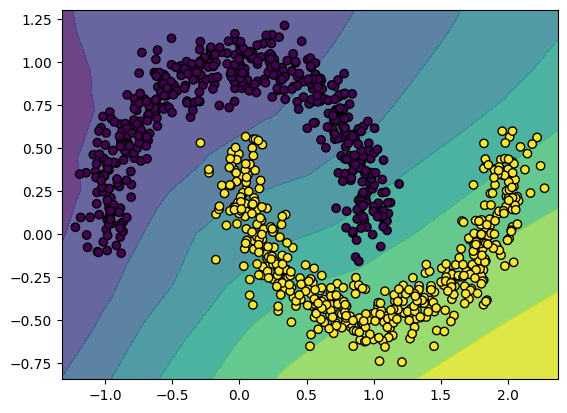

In [33]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        pred_func = model(grid)
    z = pred_func.reshape(xx.shape).numpy()
    plt.contourf(xx, yy, z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X.numpy(), y.numpy())


**Step 6: Replicate Tanh Activation Function**
I’ll replicate the Tanh activation function in pure PyTorch.

In [34]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Test the Tanh function
x = torch.tensor([1.0, -1.0, 0.0])
print(tanh(x))


tensor([ 0.7616, -0.7616,  0.0000])


**Step 7: Create Multi-Class Dataset and Model**
I’ll create a multi-class dataset using the spirals data creation function and construct a model capable of fitting the data.

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
)
Epoch 10/100, Train Loss: 1.1079, Train Acc: 0.3333, Test Loss: 1.0965, Test Acc: 0.3333
Epoch 20/100, Train Loss: 1.0925, Train Acc: 0.3373, Test Loss: 1.0860, Test Acc: 0.3958
Epoch 30/100, Train Loss: 1.0768, Train Acc: 0.6719, Test Loss: 1.0756, Test Acc: 0.6534
Epoch 40/100, Train Loss: 1.0618, Train Acc: 0.5769, Test Loss: 1.0672, Test Acc: 0.5455
Epoch 50/100, Train Loss: 1.0486, Train Acc: 0.5983, Test Loss: 1.0573, Test Acc: 0.5303
Epoch 60/100, Train Loss: 1.0332, Train Acc: 0.6068, Test Loss: 1.0433, Test Acc: 0.5758
Epoch 70/100, Train Loss: 1.0152, Train Acc: 0.6239, Test Loss: 1.0262, Test Acc: 0.5909
Epoch 80/100, Train Loss: 0.9943, Train Acc: 0.6239, Test Loss: 1.0067, Test Acc: 0.5909
Epoch 90/100, Train Loss: 0.9695, Train Acc: 0.6325, Test Loss: 0.

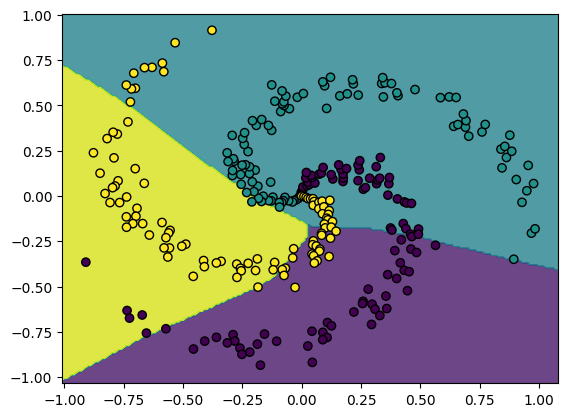

In [35]:
#Step 1: Create and Prepare the Dataset
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def generate_spiral_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y

X, y = generate_spiral_data(100, 3)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Step 2: Build the model below
import torch.nn as nn

class SpiralModel(nn.Module):
    def __init__(self):
        super(SpiralModel, self).__init__()
        self.layer_1 = nn.Linear(2, 16)
        self.layer_2 = nn.Linear(16, 16)
        self.layer_3 = nn.Linear(16, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x

model = SpiralModel()
print(model)

#Step 3: Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Step 4: Create Training and Testing Loop
from torchmetrics.classification import MulticlassAccuracy

# Accuracy function for multi-class classification
accuracy_fn = MulticlassAccuracy(num_classes=3)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_acc = accuracy_fn(y_pred.argmax(dim=1), y_train)

    # Testing loop
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        test_acc = accuracy_fn(y_test_pred.argmax(dim=1), y_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, "
              f"Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}")

#Step 5: Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        pred_func = model(grid)
    z = pred_func.argmax(dim=1).reshape(xx.shape).numpy()
    plt.contourf(xx, yy, z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X.numpy(), y.numpy())

